# DSCI 6001 - 3.4: Singular Value Decomposition

The diagonalization process discussed in the previous lectures, factorizes a square matrix into three matrices, namely ${\bf A} = {\bf PDP}^{-1}$. 

In this lecture we will develop a generalization of the diagonalization process called _singular value decomposition_ (SVD), and it can be applied to any type of matrix, even rectangular matrices. 

### SVD: An introduction

Suppose that we have an $n \times m$ matrix $\bf A$, then the singular value decomposition is the factorization of $\bf A$ as the product

$${\bf A} = {\bf U\Delta V}^T$$

where
- $\bf U$ is an $n\times n$ orthogonal matrix.

- $\bf V$ is an $m\times m$ orthogonal matrix.

- $\bf \Delta$ is an $n \times m$ diagonal (but rectangular) matrix: (for $n > m$)

$${\bf \Delta} = \left[ \begin{matrix} \delta_1 & 0 & \cdots & 0 \\ 0 & \delta_2 & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & \delta_m \\
\vdots & \vdots & \vdots & \vdots \\ 0 & 0 & \cdots & 0 \end{matrix} \right]$$


Here $\delta_1 \ge \delta_2 \ge \cdots \ge \delta_m \ge 0$ are the _singular values_ of $\bf A$. 

The singular values are given by $\delta_i = \sqrt{\lambda_i}$, where $\lambda_i$ are eigenvalues of ${\bf A}^T {\bf A}$. The matrix ${\bf A} {\bf A}^T$ has the same rank as that of ${\bf A}^T {\bf A}$, and its nonzero eigenvalues are $\lambda_i$. 


#### The use of ${\bf A} {\bf A}^T$ and ${\bf A}^T {\bf A}$ and their relationships to feature and variable space.

The columns of $\bf U$ are the eigenvectors of ${\bf A} {\bf A}^T$ and they form an orthogonal basis for $R^n$. The best way to think of them is the spanning vectors of the eigenspace of the columns of ${\bf A}$. In terms of data science, the eigenvectors capture the deformation relationships within the *feature space* of ${\bf A}$.

Similarly, the columns of $\bf V$ are the eigenvectors of ${\bf A}^T {\bf A}$ for eigenvalues $\lambda_i$ and they form an orthogonal basis for $R^m$. The eigenvectors capture deformation relationships within the *variable space* of ${\bf A}$. 

Singular value decomposition proceeds via diagonalization of the eigenvectors of ${\bf A} {\bf A}^T$ and ${\bf A}^T {\bf A}$.

## QUIZ:

Can you intuit why we say the eigenvectors of $U$ capture the deformation relationships in the feature space, and $V$ in the variable space of $A$?

#### Example

Consider the following rectangular matrix

$${\bf A} = \left[ \begin{matrix} 4 & 11 & 14 \\ 8 & 7 & -2 \end{matrix} \right]$$

**Finding ${\bf V}$**

First step is to find the orthogonal diagonalization of the symmetric matrix

$${\bf A}^T{\bf A} = \left[ \begin{matrix} 4 & 8 \\ 11 & 7 \\ 14 & -2 \end{matrix} \right] \left[ \begin{matrix} 4 & 11 & 14 \\ 8 & 7 & -2 \end{matrix} \right] = \left[ \begin{matrix} 80 & 100 & 40 \\ 100 & 170  & 140 \\ 40 & 140 & 200 \end{matrix} \right]$$

The eigenvalues of ${\bf A}^T{\bf A}$ are $\lambda_1 = 360$, $\lambda_2 = 90$ and $\lambda_3 = 0$. The corresponding eigenvectors are 

In [2]:
import numpy as np

A = np.asarray([[4, 11, 14],[8, 7, -2]])
A.dot(A.T)

np.linalg.eig(A.dot(A.T))

(array([ 360.,   90.]), array([[ 0.9486833 , -0.31622777],
        [ 0.31622777,  0.9486833 ]]))

$${\bf v}_1 = \left[ \begin{matrix} 1/3 \\ 2/3 \\ 2/3 \end{matrix} \right], ~~~~{\bf v}_2 = \left[ \begin{matrix} -2/3 \\ -1/3 \\ 2/3 \end{matrix} \right], ~~~~{\bf v}_3 = \left[ \begin{matrix} 2/3 \\ -2/3 \\ 1/3 \end{matrix} \right]$$

The matrix $\bf V$ is simply composed of the above orthonormal eigenvectors:

$${\bf V} = \left[ \begin{matrix} {\bf v}_1 & {\bf v}_2 & {\bf v}_3 \end{matrix} \right] = \left[ \begin{matrix} 1/3 & -2/3 & 2/3 \\ 2/3 & -1/3 & -2/3 \\ 2/3 & 2/3 & 1/3 \end{matrix} \right]$$

**Finding $\bf \Delta$**

The marix $\bf \Delta$ is constructed using singular values which are given by nonzero eigenvalues of ${\bf A}^T{\bf A}$:

$$\delta_1 = \sqrt{\lambda_1} = 6\sqrt{10}, ~~~~ \delta_2 = \sqrt{\lambda_2} = 3\sqrt{10}$$

The nonzero singular values are the diagonal entries of $\bf \Delta$. The shape of $\bf \Delta$ is the same as $\bf A$, so we'll add one column of zeros to get the right shape:

$${\bf \Delta} = \left[ \begin{matrix} 6\sqrt{10} & 0 & 0 \\ 0 & 3\sqrt{10} & 0 \end{matrix} \right]$$

##QUIZ:

WHat are the eigenvalues of $\bf A$ in the example above??

**Finding ${\bf U}$ The Hard Way**

The most natural way to calculate the ${\bf U}$ is to compute the diagonalization of ${\bf A} {\bf A}^T$.

${\bf A} {\bf A}^T$ is written:

$${\bf A} {\bf A}^T = \left[ \begin{matrix} 4 & 11 & 14 \\ 8 & 7 & -2 \end{matrix} \right]\left[ \begin{matrix} 4 & 8 \\ 11 & 7 \\ 14 & -2 \end{matrix} \right]  = \left[ \begin{matrix} 333 && 81 \\ 81 && 117 \end{matrix} \right]$$

The characteristic equation of this matrix is:
$$\lambda^{2}- 450\lambda + 32400 = (\lambda-360)(\lambda-90)$$

The eigenvalues of this matrix are $\lambda_1 = 360$, $\lambda_2 = 90$, exactly as it was for ${\bf A}^{T}{\bf A}$. (Note that there is **not** a third eigenvalue here - this harmony between ${\bf A}^{T}{\bf A}$ and ${\bf A}{\bf A}^{T}$ is normal and expected).

Using the above eigenvalues, ${\bf A}$ has the following eigenvectors:

$$u_1 = \left[ \begin{matrix} 3/\sqrt{10} \\ 1/\sqrt{10} \end{matrix} \right]$$
$$u_2 = \left[ \begin{matrix} -1/\sqrt{10} \\ 3/\sqrt{10} \end{matrix} \right]$$

Therefore

$${\bf U} = \left[ \begin{matrix} {\bf u}_1 & {\bf u}_2 \end{matrix} \right] = \left[ \begin{matrix} 3/\sqrt{10} & -1/\sqrt{10} \\ 1/\sqrt{10} & 3/\sqrt{10} \end{matrix} \right]$$

Note that your solution can differ by a sign.

#### Finding $U$ the "easy way"

This method can be somewhat confusing to new students, hence we teach both.

Suppose we want to find ${\bf A} = {\bf U\Delta V}^{T}$. Multiplying both sides by $\bf V$ gives

$${\bf AV} = {\bf U\Delta}$$

Going back to the vector definition of a matrix, the $i$th column of ${\bf AV}$ is ${\bf Av}_i$, while the $i$th column of ${\bf U\Delta}$ is $\delta_i {\bf u}_i$.

Therefore we must have:

$${\bf Av}_i = \delta_i {\bf u}_i ~~~~~ \text{or}~~~~~ {\bf u}_i = \frac{1}{\delta_i} {\bf Av}_i$$

And we can find the columns of $U$ by transforming the columns of $V$ by $A$ and dividing by the eigenvalue of the column.

In this example, we have

$${\bf u}_1 = \frac{1}{\delta_i} {\bf Av}_1 = \frac{1}{6\sqrt{10}} \left[ \begin{matrix} 4 & 11 & 14 \\ 8 & 7 & -2 \end{matrix} \right] \left[ \begin{matrix} 1/3 \\ 2/3 \\ 2/3 \end{matrix} \right] = \frac{1}{6\sqrt{10}} \left[ \begin{matrix} 18 \\ 6 \end{matrix} \right] = \left[ \begin{matrix} 3/\sqrt{10} \\ 1/\sqrt{10} \end{matrix} \right]$$

$${\bf u}_2 = \frac{1}{\delta_i} {\bf Av}_2 = \frac{1}{3\sqrt{10}} \left[ \begin{matrix} 4 & 11 & 14 \\ 8 & 7 & -2 \end{matrix} \right] \left[ \begin{matrix} -2/3 \\ -1/3 \\ 2/3 \end{matrix} \right] = \frac{1}{3\sqrt{10}} \left[ \begin{matrix} 3 \\ -9 \end{matrix} \right] = \left[ \begin{matrix} 1/\sqrt{10} \\ -3/\sqrt{10} \end{matrix} \right]$$

Therefore

$${\bf U} = \left[ \begin{matrix} {\bf u}_1 & {\bf u}_2 \end{matrix} \right] = \left[ \begin{matrix} 3/\sqrt{10} & 1/\sqrt{10} \\ 1/\sqrt{10} & -3/\sqrt{10} \end{matrix} \right]$$

Thus the singular value decomposition of $\bf A$ is 

$${\bf A} = \left[ \begin{matrix} 3/\sqrt{10} & 1/\sqrt{10} \\ 1/\sqrt{10} & -3/\sqrt{10} \end{matrix} \right] \left[ \begin{matrix} 6\sqrt{10} & 0 & 0 \\ 0 & 3\sqrt{10} & 0 \end{matrix} \right] \left[ \begin{matrix} 1/3 & 2/3 & 2/3 \\ -2/3 & -1/3 & 2/3 \\ 2/3 & -2/3 & 1/3 \end{matrix} \right] $$

### QUIZ:

How do we intuit the result  $${\bf AV} = {\bf U\Delta}$$? What is the main property that allows us to do this?


In [3]:
from __future__ import division
import numpy as np
from math import sqrt

v1 = np.array([[1],[2],[2]])/3
v2 = np.array([[-2],[-1],[2]])/3
v3 = np.array([[2],[-2],[1]])/3

V = np.hstack((v1,v2,v3))

u1 = np.array([[3],[1]])/sqrt(10)
u2 = np.array([[1],[-3]])/sqrt(10)

U = np.hstack((u1,u2))

D = np.diag([6,3])*sqrt(10)
D = np.hstack((D, np.zeros((2,1))))

print U.dot(D.dot(V.T))

print U
print V

[[  4.  11.  14.]
 [  8.   7.  -2.]]
[[ 0.9486833   0.31622777]
 [ 0.31622777 -0.9486833 ]]
[[ 0.33333333 -0.66666667  0.66666667]
 [ 0.66666667 -0.33333333 -0.66666667]
 [ 0.66666667  0.66666667  0.33333333]]


In [4]:
#numpy svd results
A = np.array([[4, 11, 14],[8,7,-2]])
np.linalg.svd(A)

(array([[-0.9486833 , -0.31622777],
        [-0.31622777,  0.9486833 ]]),
 array([ 18.97366596,   9.48683298]),
 array([[-0.33333333, -0.66666667, -0.66666667],
        [ 0.66666667,  0.33333333, -0.66666667],
        [-0.66666667,  0.66666667, -0.33333333]]))

####Example

Consider the following rectangular matrix

$${\bf A} = \left[ \begin{matrix} 1 & 1 \\ 1 & 0 \\ 0 & 1 \end{matrix} \right]$$

Note that in this case $n \ge m$.

$${\bf A}^T {\bf A} = \left[ \begin{matrix} 1 & 1 & 0 \\ 1 & 0 & 1 \end{matrix} \right] \left[ \begin{matrix} 1 & 1 \\ 1 & 0 \\ 0 & 1 \end{matrix} \right] = \left[ \begin{matrix} 2 & 1 \\ 1 & 2 \end{matrix} \right]$$

This is a symmetric matrix with eigenvalues $\lambda_1 = 3$ and $\lambda_2 = 1$. 

The normalized eigenvectors of ${\bf A}^T {\bf A}$ corresponding to $\lambda_1 = 3$ and $\lambda_2 = 1$ are

$${\bf v}_1 = \left[ \begin{matrix} 1/\sqrt{2} \\ 1/\sqrt{2} \end{matrix} \right], ~~~~~ {\bf v}_2 = \left[ \begin{matrix} -1/\sqrt{2} \\ 1/\sqrt{2} \end{matrix} \right]$$

Note that $\bf v$'s are orthonormal. These eigenvectors are the columns of the right singular matrix $\bf V$:

$${\bf V} =  \left[ \begin{matrix} {\bf v}_1 & {\bf v}_2 \end{matrix} \right] = \left[ \begin{matrix} 1/\sqrt{2} & -1/\sqrt{2} \\ 1/\sqrt{2} & 1/\sqrt{2} \end{matrix} \right]$$

Thus the singular values of $\bf A$ are $\delta_1 = \sqrt{\lambda_1} = \sqrt{3}$ and $\delta_2 = \sqrt{\lambda_2} = 1$. The diagonal matrix $\bf \Delta$ in SVD must have the same shape as $\bf A$. Therefore

$${\bf \Delta} = \left[ \begin{matrix} \sqrt{3} & 0 \\ 0 & 1 \\ 0 & 0 \end{matrix} \right]$$

For $\bf U$, we compute

$${\bf u}_1 = \frac{1}{\delta_1} {\bf Av}_1 = \frac{1}{\sqrt{3}} \left[ \begin{matrix} 1 & 1 \\ 1 & 0 \\ 0 & 1 \end{matrix} \right] \left[ \begin{matrix} 1/\sqrt{2} \\ 1/\sqrt{2} \end{matrix} \right] =  \left[ \begin{matrix} 2/\sqrt{6} \\ 1/\sqrt{6} \\ 1/\sqrt{6} \end{matrix} \right]$$

$${\bf u}_2 = \frac{1}{\delta_2} {\bf Av}_2 = \frac{1}{1} \left[ \begin{matrix} 1 & 1 \\ 1 & 0 \\ 0 & 1 \end{matrix} \right] \left[ \begin{matrix} -1/\sqrt{2} \\ 1/\sqrt{2} \end{matrix} \right] =  \left[ \begin{matrix} 0 \\ -1/\sqrt{2} \\ 1/\sqrt{2} \end{matrix} \right]$$

This time we need to extend $\{ {\bf u}_1, {\bf u}_2\}$ to an orthonormal basis for $R^3$. We need to find a unit vector ${\bf u}_3$ that is orthogonal to both ${\bf u}_1$ and ${\bf u}_2$. That is

$${\bf u}^T_1 {\bf u}_3 = 0, ~~~~~\text{and} ~~~~~{\bf u}^T_2 {\bf u}_3 = 0$$

If ${\bf u}_3 = [x_1 ~~ x_2 ~~ x_3]^T$, we get two linear equations

$$2 x_1 + x_2 + x_3 = 0,~~~~~\text{and}~~~~~ - x_2 + x_3 = 0$$

Choosing $x_3 = 1$, we get $x_2 = 1$ and $x_1 = -1$. Thus ${\bf u}_3 = [-1 ~~ 1 ~~ 1]^T$. Normalizing this gives

$${\bf u}_3 = \left[ \begin{matrix} -1/\sqrt{3} \\ 1/\sqrt{3} \\ 1/\sqrt{3} \end{matrix} \right]$$

The left singular matrix in SVD is 

$${\bf U} = \left[ \begin{matrix} {\bf u}_1 & {\bf u}_2 & {\bf u}_3 \end{matrix} \right] = \left[ \begin{matrix} 2/\sqrt{6} & 0 & -1/\sqrt{3} \\ 1/\sqrt{6} & -1/\sqrt{2} & 1/\sqrt{3} \\ 1/\sqrt{6} & 1/\sqrt{2} & 1/\sqrt{3} \end{matrix} \right]$$

Putting it all together, we have the SVD

$${\bf A} = \left[ \begin{matrix} 2/\sqrt{6} & 0 & -1/\sqrt{3} \\ 1/\sqrt{6} & -1/\sqrt{2} & 1/\sqrt{3} \\ 1/\sqrt{6} & 1/\sqrt{2} & 1/\sqrt{3} \end{matrix} \right] \left[ \begin{matrix} \sqrt{3} & 0 \\ 0 & 1 \\ 0 & 0 \end{matrix} \right] \left[ \begin{matrix} 1/\sqrt{2} & 1/\sqrt{2} \\ -1/\sqrt{2} & 1/\sqrt{2} \end{matrix} \right]$$

In [5]:
from __future__ import division
import numpy as np
from math import sqrt

v1 = np.array([[1],[1]])/sqrt(2)
v2 = np.array([[-1],[1]])/sqrt(2)
               
V = np.hstack((v1,v2))

u1 = np.array([[2],[1],[1]])/sqrt(6)
u2 = np.array([[0],[-1],[1]])/sqrt(2)
u3 = np.array([[-1],[1],[1]])/sqrt(3)

U = np.hstack((u1,u2,u3))

D = np.diag([sqrt(3),1])
D = np.vstack((D, np.zeros((1,2))))

U.dot(D.dot(V.T))

array([[  1.00000000e+00,   1.00000000e+00],
       [  1.00000000e+00,   1.11022302e-16],
       [  1.11022302e-16,   1.00000000e+00]])

We can now summarize the method of finding the singular value decomposition of an $n\times m$ vector $\bf A$. To construct the orthogonal matrix $\bf V$, we first find an orthogonal basis $\{ {\bf v}_1, \cdots, {\bf v}_m\}$ for $R^m$ consisting of eigenvectors of the $m \times m$ symmetric matrix ${\bf A}^T {\bf A}$. Then

$${\bf V} = \left[ \begin{matrix} {\bf v}_1 & \cdots & {\bf v}_m \end{matrix} \right]$$

is an $m\times m$ orthogonal matrix.

The nonzero eigenvalues of ${\bf A}^T {\bf A}$ form the diagonal of $\bf \Delta$. The shape of the matrix $\bf \Delta$ must be $n \times m$. Therefore we pad the matrix $\bf \Delta$ with rows and/or columns of zeros by keeping the singular values in upper left corner of the matrix. Symbolically

$${\bf \Delta} = \left[ \begin{matrix} {\bf D} & {\bf 0} \\ {\bf 0} & {\bf 0} \end{matrix} \right]$$

where $\bf D$ is a diagonal matrix with $r$ nonzero singular values

$${\bf D} = \left[ \begin{matrix} \delta_1 & \cdots & 0 \\ \vdots & \ddots & \vdots \\ 0 & \cdots & \delta_r  \end{matrix} \right]$$

For the orthogonal matrix $\bf U$, we first find the orthogonal vectors $\bf u$'s using

$${\bf u}_i = \frac{1}{\delta_i} {\bf Av}_i, ~~~~~ \text{for } i=1,2,\cdots,r$$

corresponding to $r$ nonzero singular values. If $r < n$, then the set $\{ {\bf u}_1, \cdots, {\bf u}_r \}$ will not be a basis for $R^n$. In this case we extend this set to an orthonormal basis  $\{ {\bf u}_1, \cdots, {\bf u}_n \}$ for $R^n$. This is the only tricky part of the construction. Then we set

$${\bf U} = \left[ \begin{matrix} {\bf u}_1 & \cdots & {\bf u}_n \end{matrix} \right]$$

Puting it all together, we get the decomposition:

$${\bf A} = {\bf U\Delta V}^T$$

###Reduced SVD

When $\bf \Delta$ contains rows or columns fo zeros, a more compact decomposition of $\bf A$ is possible. This is achived by removing columns of $\bf U$ and $\bf V$ corresponding to zero enttries of $\bf \Delta$. Since there are $r$ entries in $\bf D$, we can have reduced SVD given by

$${\bf A}_r = {\bf U}_r {\bf D V}_r^T$$

where ${\bf U}_r = [{\bf u}_1 ~~ \cdots ~~{\bf u}_r]$ is an $n\times r$ matrix and ${\bf V}_r = [{\bf v}_1 ~~ \cdots ~~{\bf v}_r]$ is an $m \times r$ matrix.

The reduced SVD for the matrix in the first example is

$${\bf A}_r = \left[ \begin{matrix} 3/\sqrt{10} & 1/\sqrt{10} \\ 1/\sqrt{10} & -3/\sqrt{10} \end{matrix} \right] \left[ \begin{matrix} 6\sqrt{10} & 0 \\ 0 & 3\sqrt{10} \end{matrix} \right] \left[ \begin{matrix} 1/3 & 2/3 & 2/3 \\ -2/3 & -1/3 & 2/3  \end{matrix} \right] $$

In [6]:
from __future__ import division
import numpy as np
from math import sqrt

v1 = np.array([[1],[2],[2]])/3
v2 = np.array([[-2],[-1],[2]])/3
#v3 = np.array([[2],[-2],[1]])/3

V = np.hstack((v1,v2)) # excluding v3

u1 = np.array([[3],[1]])/sqrt(10)
u2 = np.array([[1],[-3]])/sqrt(10)

U = np.hstack((u1,u2))

D = np.diag([6,3])*sqrt(10)

A = U.dot(D.dot(V.T))
A

array([[  4.,  11.,  14.],
       [  8.,   7.,  -2.]])

The reduced SVD leads directly to the spectral decomposition of $\bf A$:

$${\bf A}_r = \begin{bmatrix} {\bf u}_1 & \cdots & {\bf u}_r \end{bmatrix} \begin{bmatrix} \delta_1 & & \\ & \ddots & \\ & & \delta_r \end{bmatrix} \begin{bmatrix} {\bf v}_1^T \\ \vdots \\ {\bf v}_r^T \end{bmatrix} $$

$${\bf A}_r = \delta_1 {\bf u}_1 {\bf v}_1^T + \delta_2 {\bf u}_2 {\bf v}_2^T + \cdots + \delta_r {\bf u}_r {\bf v}_r^T$$

###EXAMPLE

Let explore image compression using SVD!

Use the following image as a test case.

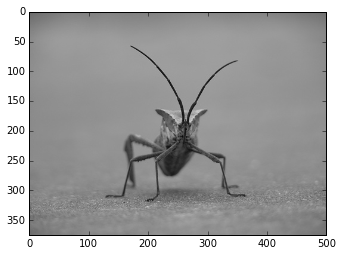

In [8]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm

%matplotlib inline

img=mpimg.imread('img/stinkbug.png')
plt.imshow(img)

In [12]:
img.shape

(375, 500, 3)

(a) The `imread` function returns a `numpy.array`. What is the shape of this array?

(b) Reshape the image array to get a two dimensinal arrray and use svd to obtain reduced image. (Note: You'll have to reshape the reduced array before plotting the image.)

(c) To store an image, we need to store $n \times m \times 3$ entries. This technique only makes sense as an image compression tool if we have less to store by computing ${\bf A}_r$ than we would if we just stored all of A. Otherwise, there would be absolutely no purpose in storing the same amount of data or more to have an imperfect approximation to A instead of the real thing. Find a condition on $r$ (depending on $n$ and $m$) so that the storage needs for the approximation ${\bf A}_r$ are less than the storage needs for $\bf A$.

(d) For the given image, what value of $r$ seems to give an approximation that you would deem
satisfactory to the naked eye? Does this value of $r$ meet the condition you found in (c)?

In [13]:
sh = img.shape
print sh
A = img.reshape(sh[0],sh[1]*sh[2])
L, S, R = np.linalg.svd(A)

(375, 500, 3)


In [16]:
sh[2]

3

(50, 1500)
(375, 50)


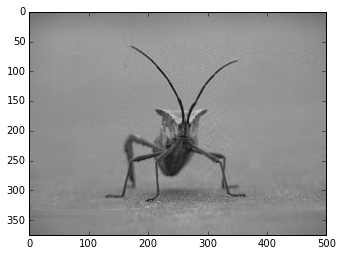

In [20]:
r = 50
Rr = R[:r,:]
print Rr.shape
Lr = L[:,:r]
print Lr.shape
Sd = np.diag(S)
Sr = Sd[0:r,0:r]

Ar = Lr.dot(Sr.dot(Rr))
plt.imshow(Ar.reshape(sh));

##Assigned Problems:

1. Calculate the SVD of $A = \begin{bmatrix}1 & 0 & 1 & 0\\ 0 & 1 & 0 & 1\end{bmatrix}$
2. Calculate the SVD of $A = \begin{bmatrix}0 & 1 & 1\\ \sqrt{2} & 2 & 0 \\0 & 1 & 1\end{bmatrix}$